In [7]:
# Watch for any changes and reload it automatically
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
%reload_ext autoreload

In [22]:
import os
import sys
sys.path.insert(0, '/data6/lekevin/hab-master/hab_rnd')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import BoundaryNorm

# Project level imports
from validate_exp.v_utils import plot_results, compute_values, \
    compute_accuracies,\
    load_density_data, retrieve_x_y
from validate_exp.val_go import plot_sampling_correlation

# Module level constants
# MICRO_COLUMNS = 'micro_proro'.split(',')
# PRORO_COLUMNS = ['micro_proro', 'corrected_Prorocentrum',
#                  'clsfier_Prorocentrum']
# PHYTO_COLUMNS = 'spc_ImgCount,micro_total-phyto'.split(',')
# INSITU_PRED_PRE = 'insitu_pred_proro'
# INVITRO_PRED_PRE = 'invitro_pred_proro'
# MICRO_PRE = 'micro_proro'

# CLASSES = {0: 'Akashiwo', 1: 'Ceratium falcatiforme or fusus', 2: 'Ceratium furca', 3: 'Ceratium other', 4: 'Chaetoceros socialis', 5: 'Chattonella', 6: 'Ciliates', 7: 'Cochlodinium', 8: 'Curved diatom chain', 9: 'Dinophysis', 10: 'Eucampia', 11: 'Gyrodinium', 12: 'Lingulodinium polyedra', 13: 'Nauplii', 14: 'Polykrikos', 15: 'Prorocentrum michans', 16: 'Prorocentrum spp', 17: 'Pseudo-nitzschia chain', 18: 'Sand', 19: 'Straight diatom chains', 20: 'Thalassionema or Thalassiothrix chain', 21: 'Unknown naked dinoflagellates', 22: 'detritus', 23: 'other'}
CLASSES = {'Akashiwo': 1,
 'Ceratium falcatiforme or fusus': 2,
 'Ceratium furca': 3,
 'Ceratium other': 4,
 'Chaetoceros socialis': 5,
 'Chattonella': 6,
 'Ciliates': 7,
 'Cochlodinium': 8,
 'Dinophysis': 9,
 'Eucampia': 10,
 'Gyrodinium': 11,
 'Lingulodinium polyedra': 12,
 'Polykrikos': 14,
 'Prorocentrum micans': 15,
 'Prorocentrum spp': 16,
 'Pseudo-nitzschia chain': 17}

/data6/lekevin/hab-master/hab_rnd
/data6/lekevin/hab-master/hab_rnd


# Classifier Abundance Estimation Dist for Avg samples of varying time bins

Data is pulled from a 3 hour time window centered around our independent sampling time.
From that same time window, we bin each distribution into varying time bins, ranging from 1 minute to 1 hour and 30 minutes.

# Plot Correlation Results

To run correlation plot generation using this jupyter notebook, the code block expects a `Density-{<TIME>}_data.csv` to be pre-generated. You can generate one using the script `prepare_db/create_csv.py`. The code block reads data from the csv files and uses `plot_results()` to generate p

## Summer 2019 data

### invitro_vs_insitu

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     236.8
Date:                Thu, 24 Oct 2019   Prob (F-statistic):           6.38e-42
Time:                        03:13:47   Log-Likelihood:                -1337.8
No. Observations:                 384   AIC:                             2680.
Df Residuals:                     382   BIC:                             2687.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3524      0.448     -0.787      0.4

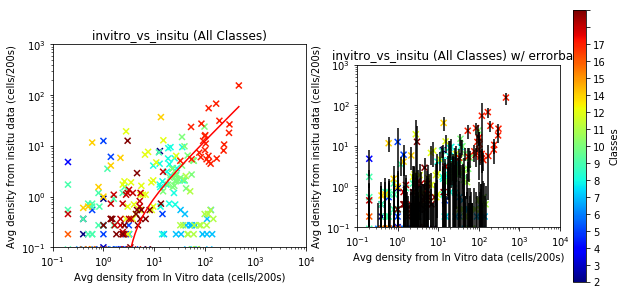

In [23]:
version = '-20Class_summer2019'
data_dir = '/data6/lekevin/hab-master/hab_rnd/experiments/exp_hab20_summer2019'
csv_fname = os.path.join(data_dir, 'Density{}.csv')
df = load_density_data(csv_fname.format(version))

plot_sampling_correlation(smpl='invitro_vs_insitu', df=df, plot_classes=False, compute_log_scale=True, t='200s', verbose=True)

### micro_vs_insitu

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     108.0
Date:                Thu, 24 Oct 2019   Prob (F-statistic):           1.93e-22
Time:                        03:14:01   Log-Likelihood:                -1382.6
No. Observations:                 384   AIC:                             2769.
Df Residuals:                     382   BIC:                             2777.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6915      0.462      3.659      0.0

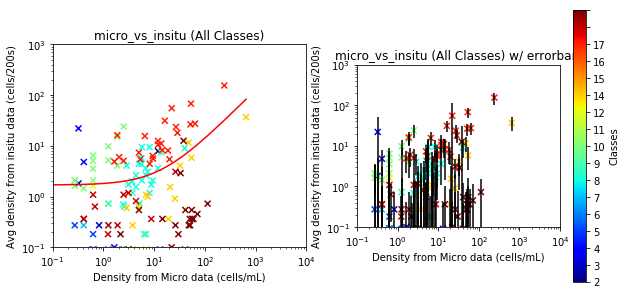

In [25]:
plot_sampling_correlation(smpl='micro_vs_insitu', df=df, plot_classes=False, compute_log_scale=True, t='200s', verbose=True)

### micro_vs_invitro

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     13.93
Date:                Thu, 24 Oct 2019   Prob (F-statistic):           0.000219
Time:                        03:14:08   Log-Likelihood:                -2028.5
No. Observations:                 384   AIC:                             4061.
Df Residuals:                     382   BIC:                             4069.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.5096      2.486      8.654      0.0

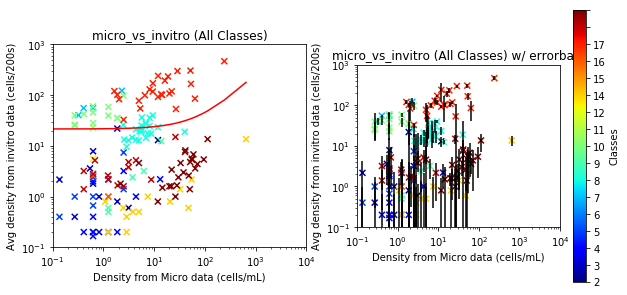

In [26]:
plot_sampling_correlation(smpl='micro_vs_invitro', df=df, plot_classes=False, compute_log_scale=True, t='200s', verbose=True)

## Field data 2017 - 2019

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     328.6
Date:                Thu, 24 Oct 2019   Prob (F-statistic):           3.24e-67
Time:                        03:14:19   Log-Likelihood:                -5425.8
No. Observations:                1680   AIC:                         1.086e+04
Df Residuals:                    1678   BIC:                         1.087e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1656      0.154      7.559      0.0

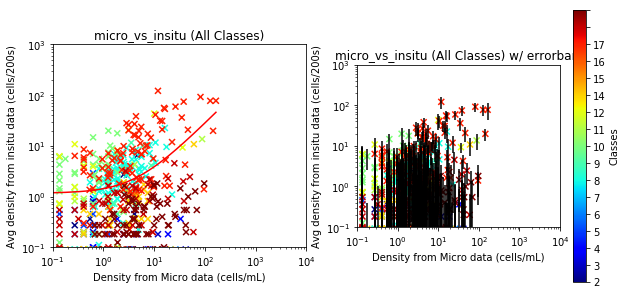

In [27]:
version = '-20Class_2017_2019'
data_dir = '/data6/lekevin/hab-master/hab_rnd/experiments/exp_hab20_2017_2019'
csv_fname = os.path.join(data_dir, 'Density{}.csv')
df = load_density_data(csv_fname.format(version))

plot_sampling_correlation(smpl='micro_vs_insitu', df=df, plot_classes=False, compute_log_scale=True, t='200s', verbose=True)

### Pier Camera | Lab Camera | Micro Plot (6-11-19)

best fit line:
y = 5.12 + 0.11x | R^2: 1.0
total time bins per sample: 180.0
best fit line:
y = 15.81 + 1.02x | R^2: 1.0
total time bins per sample: 5.0
best fit line:
y = 6.33 + 3.38x | R^2: 1.0
total time bins per sample: 5.0


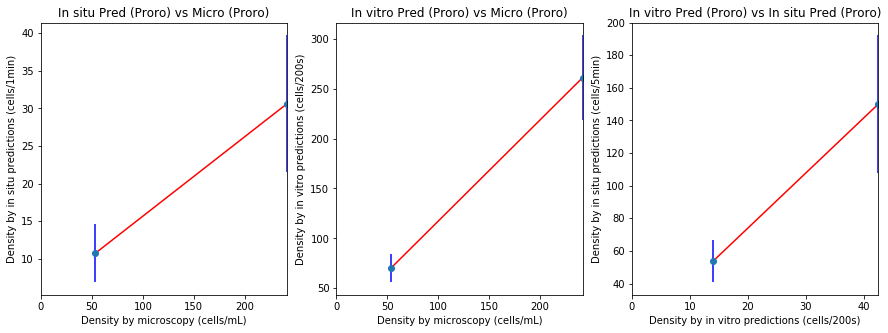

In [20]:
df = df[df['image_timestamp'].isin(['2019-05-28', '2019-06-03'])].reset_index(drop=True)
n_rows, n_cols = 1, 3
plt_width, plt_height = 5, 5
f, ax = plt.subplots(n_rows, n_cols,
                     figsize=(n_cols * plt_width, n_rows * plt_height))

# INSITU VS MICRO
t = '1min'
ylabel = 'Density by in situ predictions (cells/{})'.format(t)
xlabel = 'Density by microscopy (cells/mL)'
title = 'In situ Pred (Proro) vs Micro (Proro)'
columns = [f'{INSITU_PRED_PRE}_avg_{t}', f'{INSITU_PRED_PRE}_std_{t}',
           'micro_proro']
X, _, Y, Yerr, Xfit, Yfit = compute_values(columns, df, yerror=True,
                                        geometric_fit=False)
print('total time bins per sample: {}'.format(df[f'{INSITU_PRED_PRE}_total_smpl_{t}'].mode()[0]))
plot_results(X, Y, Yerr, Xfit, Yfit,
             ax=ax, idx=0, n_rows=n_rows, n_cols=n_cols,
             xlabel=xlabel, ylabel=ylabel, title=title)


# INVITRO VS MICRO
t = '200s'
ylabel = 'Density by in vitro predictions (cells/{})'.format(t)
xlabel = 'Density by microscopy (cells/mL)'
title = 'In vitro Pred (Proro) vs Micro (Proro)'
columns = [f'{INVITRO_PRED_PRE}_avg_{t}', f'{INVITRO_PRED_PRE}_std_{t}',
           'micro_proro']
X, _, Y, Yerr, Xfit, Yfit = compute_values(columns, df, yerror=True,
                                        geometric_fit=False)
print('total time bins per sample: {}'.format(df[f'{INVITRO_PRED_PRE}_total_smpl_{t}'].mode()[0]))
plot_results(X, Y, Yerr, Xfit, Yfit,
             ax=ax, idx=1, n_rows=n_rows, n_cols=n_cols,
             xlabel=xlabel, ylabel=ylabel, title=title)


# INVITRO VS INSITU
insitu_t = '5min'
invitro_t = '200s'
ylabel = 'Density by in situ predictions (cells/{})'.format(insitu_t)
xlabel = 'Density by in vitro predictions (cells/{})'.format(invitro_t)
title = 'In vitro Pred (Proro) vs In situ Pred (Proro)'
columns = [f'{INSITU_PRED_PRE}_avg_{insitu_t}', f'{INSITU_PRED_PRE}_std_{insitu_t}',
           f'{INVITRO_PRED_PRE}_avg_{invitro_t}', f'{INVITRO_PRED_PRE}_std_{invitro_t}']
X, Xerr, Y, Yerr, Xfit, Yfit = compute_values(columns, df, yerror=True,
                                        geometric_fit=False)
print('total time bins per sample: {}'.format(df[f'{INVITRO_PRED_PRE}_total_smpl_{t}'].mode()[0]))
plot_results(X, Y, Yerr, Xfit, Yfit,
             ax=ax, idx=2, n_rows=n_rows, n_cols=n_cols,
             xlabel=xlabel, ylabel=ylabel, title=title)

plt.show()

## MOCKUP Micro Data

best fit line:
y = 26.52 + 0.51x | R^2: 1.0
total time bins per sample: 36.0
best fit line:
y = 15.81 + 1.02x | R^2: 1.0
total time bins per sample: 5.0
best fit line:
y = 6.33 + 3.38x | R^2: 1.0
total time bins per sample: 5.0


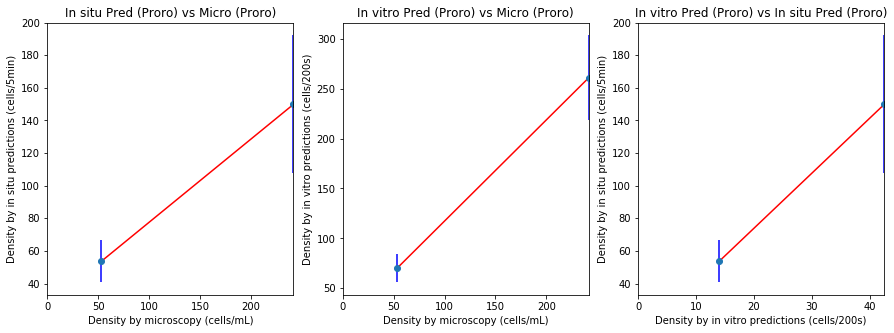

In [19]:
# time_dist = ['1min', '5min', '15min', '30min', '45min', '1h30min']
# Plot layout specifications
n_rows, n_cols = 1, 3
plt_width, plt_height = 5, 5
f, ax = plt.subplots(n_rows, n_cols,
                     figsize=(n_cols * plt_width, n_rows * plt_height))

# INSITU VS MICRO
t = '5min'
ylabel = 'Density by in situ predictions (cells/{})'.format(t)
xlabel = 'Density by microscopy (cells/mL)'
title = 'In situ Pred (Proro) vs Micro (Proro)'
columns = [f'{INSITU_PRED_PRE}_avg_{t}', f'{INSITU_PRED_PRE}_std_{t}',
           'micro_proro']
X, _, Y, Yerr, Xfit, Yfit = compute_values(columns, df, yerror=True,
                                        geometric_fit=False)
print('total time bins per sample: {}'.format(df[f'{INSITU_PRED_PRE}_total_smpl_{t}'].mode()[0]))
plot_results(X, Y, Yerr, Xfit, Yfit,
             ax=ax, idx=0, n_rows=n_rows, n_cols=n_cols,
             xlabel=xlabel, ylabel=ylabel, title=title)


# INVITRO VS MICRO
t = '200s'
ylabel = 'Density by in vitro predictions (cells/{})'.format(t)
xlabel = 'Density by microscopy (cells/mL)'
title = 'In vitro Pred (Proro) vs Micro (Proro)'
columns = [f'{INVITRO_PRED_PRE}_avg_{t}', f'{INVITRO_PRED_PRE}_std_{t}',
           'micro_proro']
X, _, Y, Yerr, Xfit, Yfit = compute_values(columns, df, yerror=True,
                                        geometric_fit=False)
print('total time bins per sample: {}'.format(df[f'{INVITRO_PRED_PRE}_total_smpl_{t}'].mode()[0]))
plot_results(X, Y, Yerr, Xfit, Yfit,
             ax=ax, idx=1, n_rows=n_rows, n_cols=n_cols,
             xlabel=xlabel, ylabel=ylabel, title=title)


# INVITRO VS INSITU
insitu_t = '5min'
invitro_t = '200s'
ylabel = 'Density by in situ predictions (cells/{})'.format(insitu_t)
xlabel = 'Density by in vitro predictions (cells/{})'.format(invitro_t)
title = 'In vitro Pred (Proro) vs In situ Pred (Proro)'
columns = [f'{INSITU_PRED_PRE}_avg_{insitu_t}', f'{INSITU_PRED_PRE}_std_{insitu_t}',
           f'{INVITRO_PRED_PRE}_avg_{invitro_t}', f'{INVITRO_PRED_PRE}_std_{invitro_t}']
X, Xerr, Y, Yerr, Xfit, Yfit = compute_values(columns, df, yerror=True,
                                        geometric_fit=False)
print('total time bins per sample: {}'.format(df[f'{INVITRO_PRED_PRE}_total_smpl_{t}'].mode()[0]))
plot_results(X, Y, Yerr, Xfit, Yfit,
             ax=ax, idx=2, n_rows=n_rows, n_cols=n_cols,
             xlabel=xlabel, ylabel=ylabel, title=title)

plt.show()

# Previous Plots (2017-2018 data)

========================= Time Distribution: 1min =========================
best fit line:
y = 0.82 + 0.14x | R^2: 0.6277377118815483
total time bins per sample: 180.0


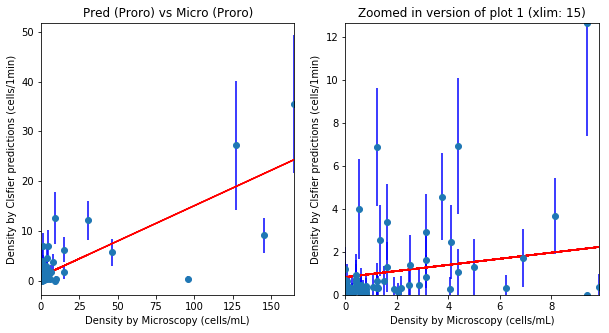

========================= Time Distribution: 5min =========================
best fit line:
y = 4.08 + 0.71x | R^2: 0.6286080374944839
total time bins per sample: 36.0


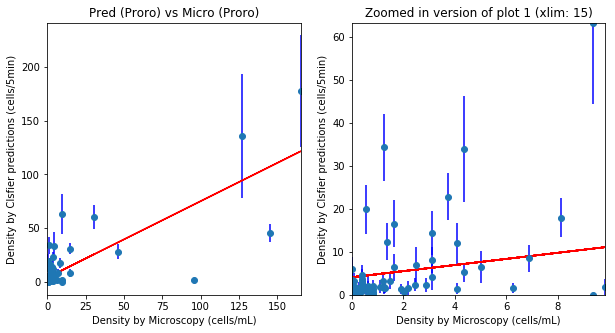

========================= Time Distribution: 15min =========================
best fit line:
y = 11.98 + 2.14x | R^2: 0.6305440787817441
total time bins per sample: 12.0


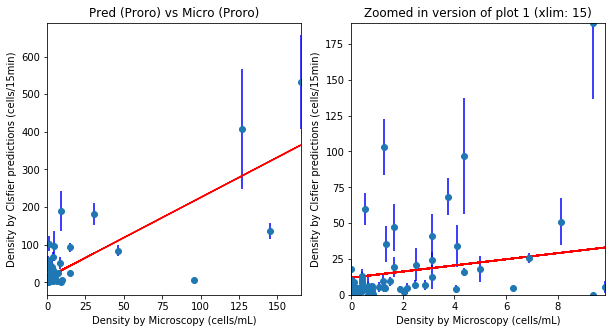

========================= Time Distribution: 30min =========================
best fit line:
y = 23.28 + 4.28x | R^2: 0.6329063858518084
total time bins per sample: 6.0


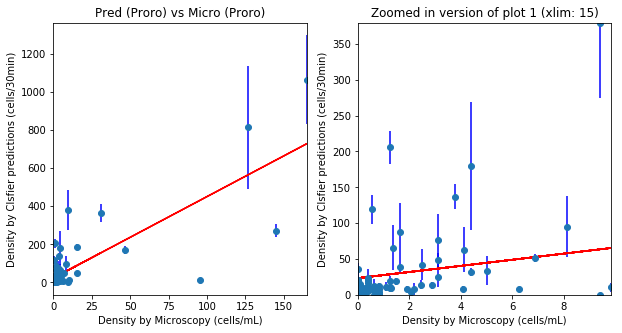

========================= Time Distribution: 45min =========================
best fit line:
y = 34.09 + 6.42x | R^2: 0.6348084644752109
total time bins per sample: 4.0


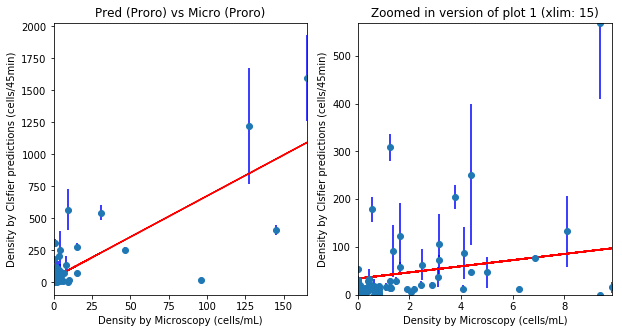

========================= Time Distribution: 1h30min =========================
best fit line:
y = 64.34 + 12.86x | R^2: 0.6386150461509883
total time bins per sample: 2.0


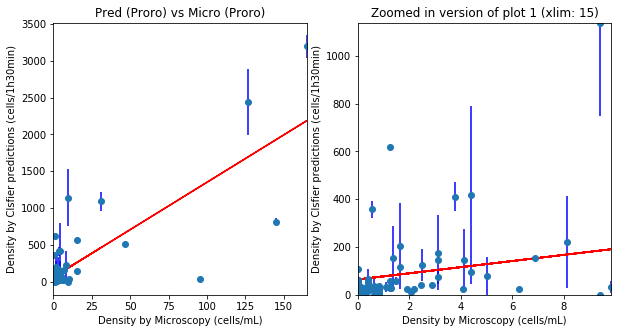

In [11]:
time_dist = ['1min', '5min', '15min', '30min', '45min', '1h30min']
# time_dist = ['5min']

for idx, t in enumerate(time_dist):
    print('=' * 25 + f' Time Distribution: {t} ' + '=' * 25)

    # Plot layout specifications
    n_rows, n_cols = 1, 2
    plt_width, plt_height = 5, 5
    f, ax = plt.subplots(n_rows, n_cols,
                         figsize=(n_cols * plt_width, n_rows * plt_height))
    ylabel = 'Density by Clsfier predictions (cells/{})'.format(t)
    xlabel = 'Density by Microscopy (cells/mL)'
    title = 'Pred (Proro) vs Micro (Proro)'

    columns = [f'clsfier_proro_avg_{t}', f'clsfier_proro_std_{t}',
               'micro_proro']

    X, _, Y, Yerr, Xfit, Yfit = compute_values(columns, df, yerror=True,
                                            geometric_fit=False)
    print('total time bins per sample: {}'.format(df[f'clsfier_proro_total_smpl_{t}'].mode()[0]))
    plot_results(X, Y, Yerr, Xfit, Yfit,
                 ax=ax, idx=0, n_rows=n_rows, n_cols=n_cols,
                 xlabel=xlabel, ylabel=ylabel, title=title)

    #     zoomed_df = df
    zoomed_df = df[df.micro_proro < 15]
    X, _, Y, Yerr, _, _ = compute_values(columns, zoomed_df, yerror=True, xyfit=(Xfit, Yfit))
    plot_results(X=X, Y=Y, Yerr=Yerr, Xfit=Xfit, Yfit=Yfit,
                 ax=ax, idx=1, n_rows=n_rows, n_cols=n_cols,
                 xlabel=xlabel, ylabel=ylabel, title='Zoomed in version of plot 1 (xlim: 15)')
    plt.ylim(0,max(Y))
    plt.show()

# Previous Correlation Plots
Correlation plots are generated by taking a time bin immediately after the assumed 10 AM sample time.
For example, on a given sample day, we aggregate the total count of detected prorocentrums within the first 5 minutes as a our time bin.

Representing the counts in this manner wasn't statistically representative for each sample date, so we adjusted our analysis to centering the times around Melissa's sample and using the average as our count. In addition, the centering is precise with Melissa's start sample time.

========================= Time Distribution: 1m =========================
best fit line:
y = -0.34 + 0.14x
Outliers cleaned up (micro_estimates >= 4 cells/mL dropped)
best fit line:
y = 0.11 + 0.01x
Outliers cleaned up (micro_estimates >= 600 cells/mL dropped)
best fit line:
y = -6.29 + 0.12x
best fit line:
y = 5.28 + 0.69x


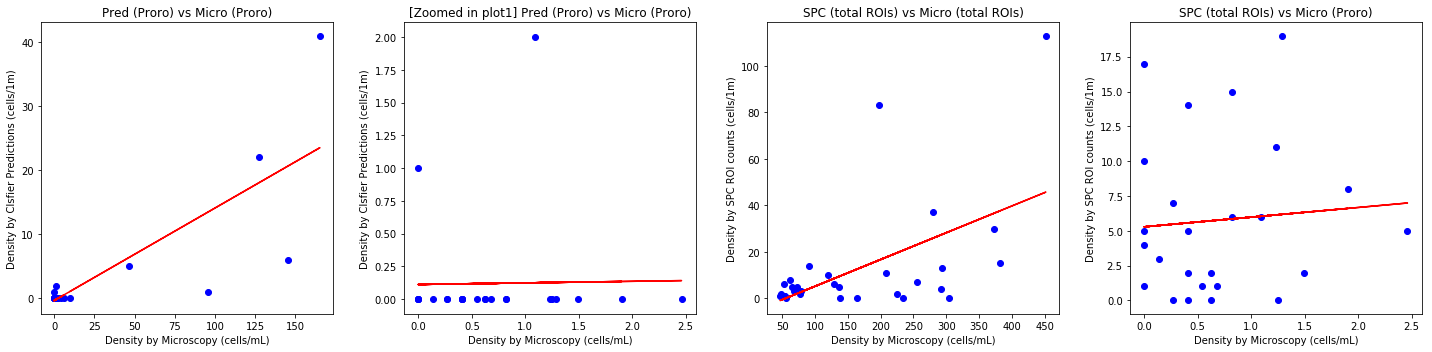

========================= Time Distribution: 5m =========================
best fit line:
y = -1.06 + 0.65x
Outliers cleaned up (micro_estimates >= 4 cells/mL dropped)
best fit line:
y = 0.57 + 0.68x
Outliers cleaned up (micro_estimates >= 600 cells/mL dropped)
best fit line:
y = -11.91 + 0.50x
best fit line:
y = 40.02 + 1.77x


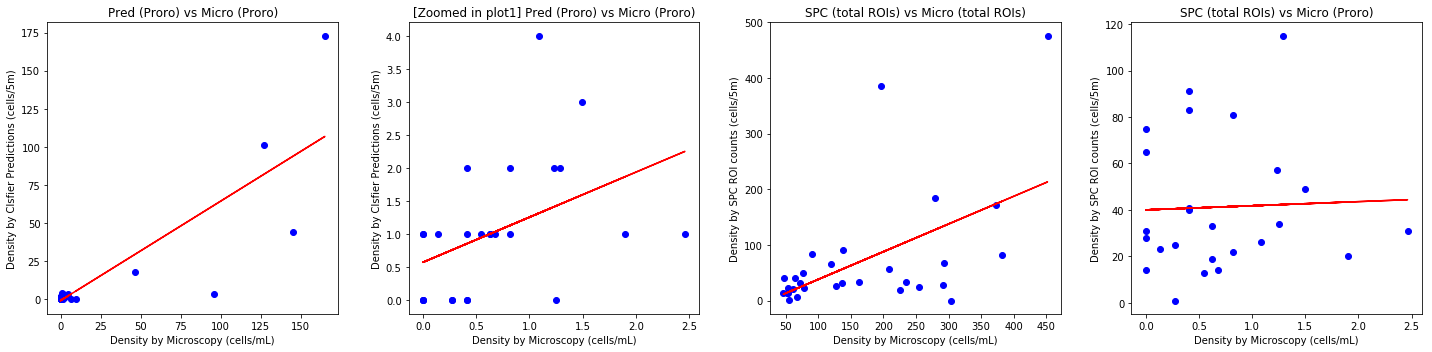

========================= Time Distribution: 7m30s =========================
best fit line:
y = -0.73 + 0.86x
Outliers cleaned up (micro_estimates >= 4 cells/mL dropped)
best fit line:
y = 0.92 + 1.04x
Outliers cleaned up (micro_estimates >= 600 cells/mL dropped)
best fit line:
y = -7.84 + 0.67x
best fit line:
y = 60.84 + 2.50x


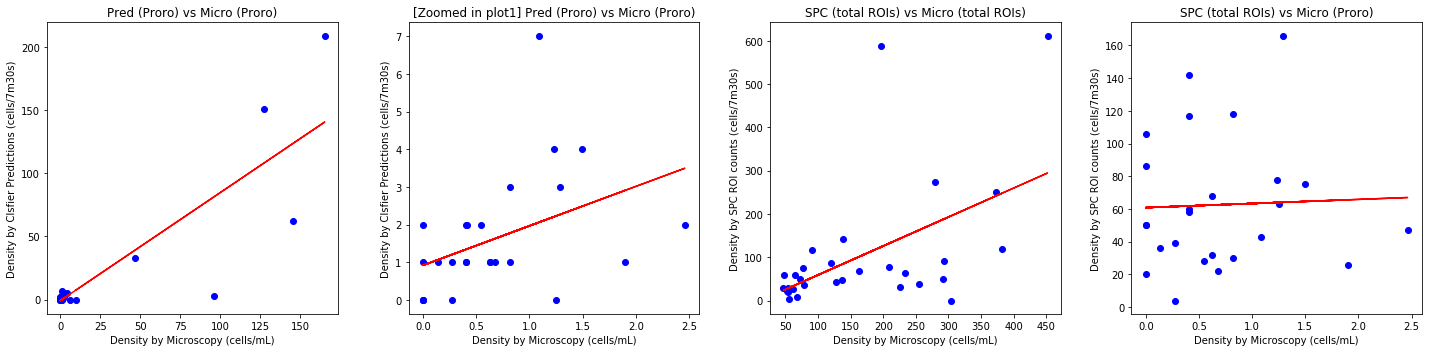

========================= Time Distribution: 10m =========================
best fit line:
y = -0.73 + 1.19x
Outliers cleaned up (micro_estimates >= 4 cells/mL dropped)
best fit line:
y = 1.34 + 1.54x
Outliers cleaned up (micro_estimates >= 600 cells/mL dropped)
best fit line:
y = -8.04 + 0.88x
best fit line:
y = 82.28 + 2.92x


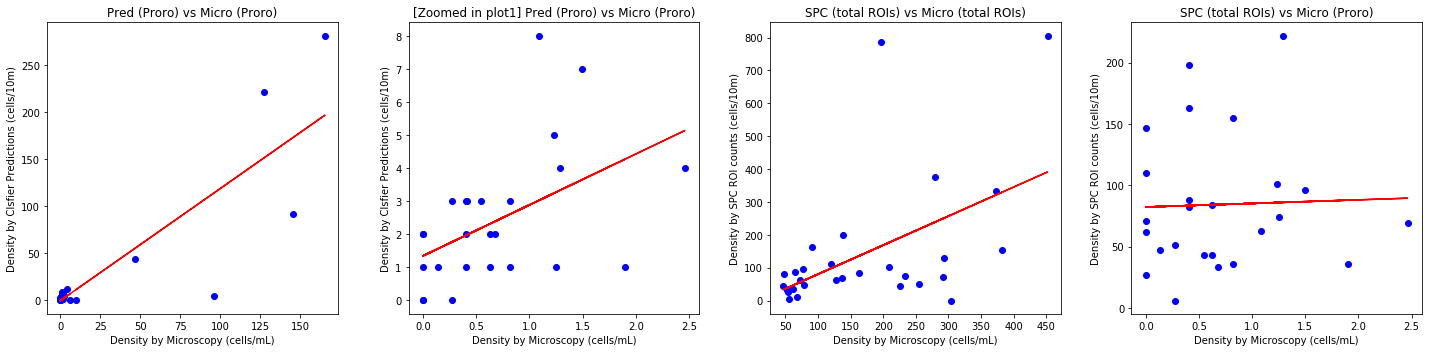

========================= Time Distribution: 15m =========================
best fit line:
y = -0.80 + 1.71x
Outliers cleaned up (micro_estimates >= 4 cells/mL dropped)
best fit line:
y = 2.10 + 2.01x
Outliers cleaned up (micro_estimates >= 600 cells/mL dropped)
best fit line:
y = 3.26 + 1.21x
best fit line:
y = 125.92 + 4.20x


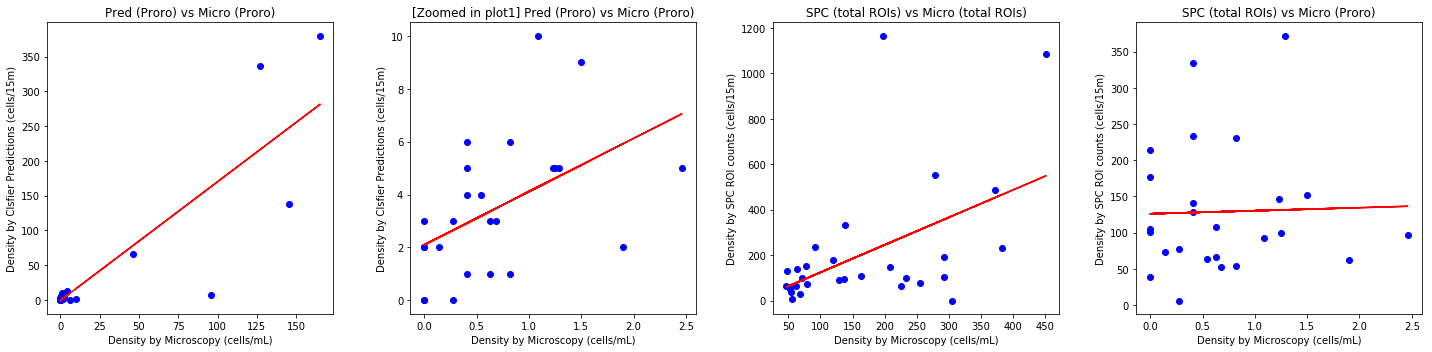

========================= Time Distribution: 30m =========================
best fit line:
y = -4.06 + 3.87x
Outliers cleaned up (micro_estimates >= 4 cells/mL dropped)
best fit line:
y = 3.75 + 4.86x
Outliers cleaned up (micro_estimates >= 600 cells/mL dropped)
best fit line:
y = -52.54 + 2.90x
best fit line:
y = 252.01 + 23.85x


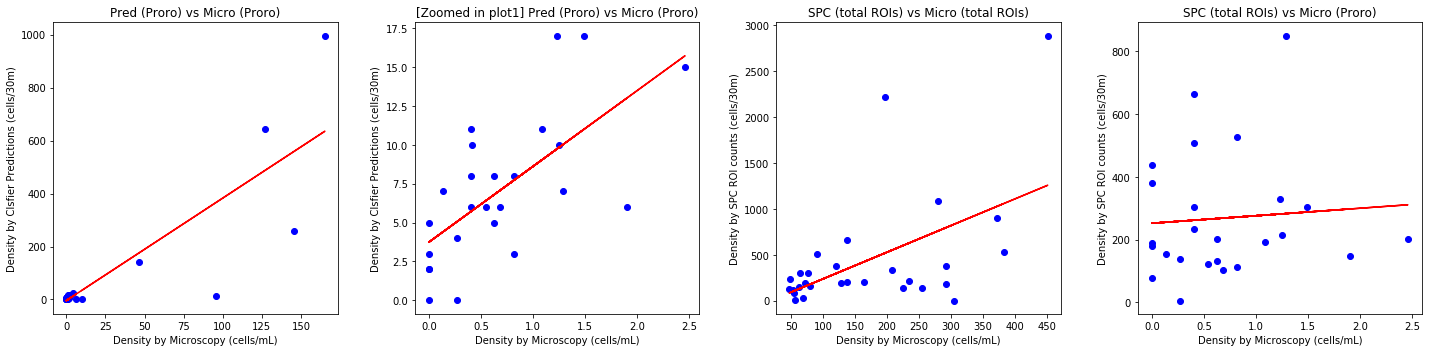

========================= Time Distribution: 1h =========================
best fit line:
y = -6.08 + 7.11x
Outliers cleaned up (micro_estimates >= 4 cells/mL dropped)
best fit line:
y = 9.94 + 5.16x
Outliers cleaned up (micro_estimates >= 600 cells/mL dropped)
best fit line:
y = -101.10 + 5.78x
best fit line:
y = 497.90 + 45.01x


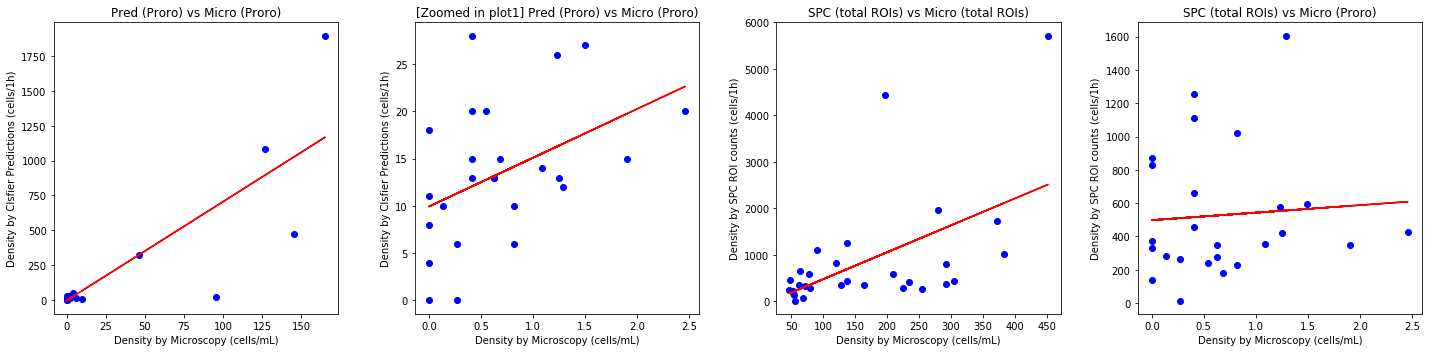

========================= Time Distribution: 2h =========================
best fit line:
y = -16.93 + 16.36x
Outliers cleaned up (micro_estimates >= 4 cells/mL dropped)
best fit line:
y = 21.90 + 8.49x
Outliers cleaned up (micro_estimates >= 600 cells/mL dropped)
best fit line:
y = -320.14 + 12.67x
best fit line:
y = 995.95 + 79.84x


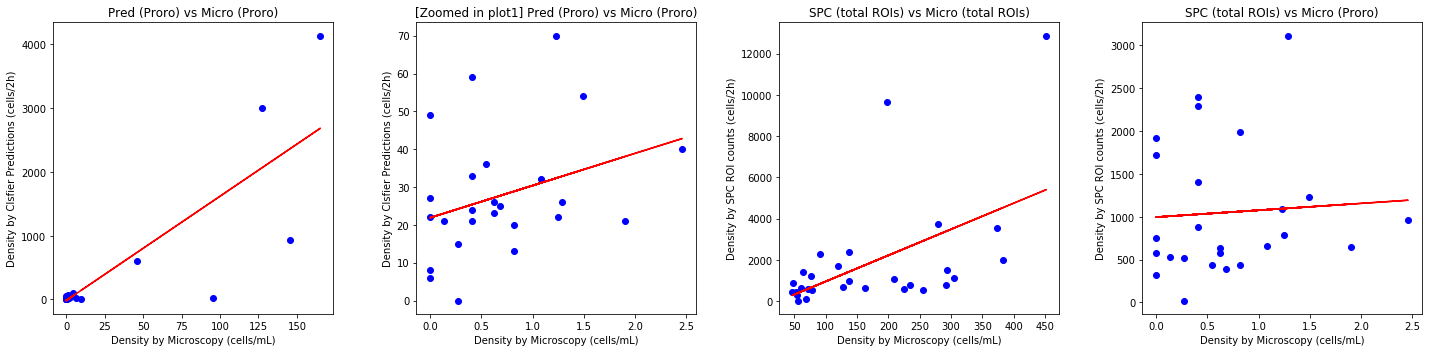

========================= Time Distribution: 2017 =========================
best fit line:
y = -26.25 + 24.76x
Outliers cleaned up (micro_estimates >= 4 cells/mL dropped)
best fit line:
y = 31.66 + 15.62x
Outliers cleaned up (micro_estimates >= 600 cells/mL dropped)
best fit line:
y = -506.87 + 19.16x
best fit line:
y = 1448.82 + 144.10x


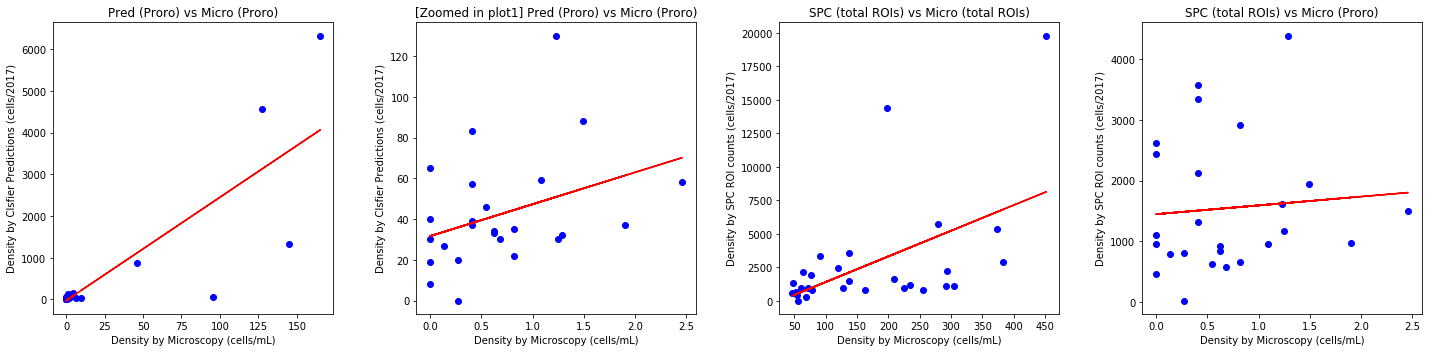

In [9]:
# Produce plots for each time distribution
time_dist = ['1m', '5m', '7m30s', '10m', '15m', '30m', '1h', '2h', '2017']
for t in time_dist:
    print('=' * 25 + f' Time Distribution: {t} ' + '=' * 25)
    
    # Plot layout specifications
    n_rows, n_cols = 1, 4
    plt_width, plt_height = 5, 5
    f, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*plt_width, n_rows*plt_height))
    ylabel_clf = ('Clsfier Predictions', t)
    ylabel_spc = ('SPC ROI counts', t)
    
    # Load data
    df = load_density_data(csv_fname.format(t))
    avbl_proro_col = sorted(list(set(df.columns).intersection(PRORO_COLUMNS)))
    
    # ======================== Begin: Generate Plots ======================== #
    # Raw plot of CLF vs Micro (Prorocentrum)
    proro_df = plot_results(avbl_proro_col, df, ax=ax, idx=0, n_cols=n_cols, n_rows=n_rows,
                            ylabel=ylabel_clf, title='Pred (Proro) vs Micro (Proro)')
    
    outliers = 4
    print('Outliers cleaned up (micro_estimates >= {} cells/mL dropped)'.format(outliers))
    cleaned_df = df[df.micro_proro < outliers]
#     cleaned_df = df

    # Zoomed in CLF vs Micro (Prorocentrum)
    proro_df = plot_results(avbl_proro_col, cleaned_df, ax=ax, idx=1, n_rows=n_rows,
                            n_cols=n_cols, ylabel=ylabel_clf, title='[Zoomed in plot1] Pred (Proro) vs Micro (Proro)')
    
    # Zoomed in SPC vs Micro (Phytoplankton)
    cleaned_roi = df[df['micro_total-phyto'] < 600]
    print('Outliers cleaned up (micro_estimates >= 600 cells/mL dropped)')
    phyto_df = plot_results(PHYTO_COLUMNS, cleaned_roi, ax=ax, idx=2, n_rows=n_rows,
                            n_cols=n_cols, ylabel=ylabel_spc, title='SPC (total ROIs) vs Micro (total ROIs)')
    
    # Zoomed in SPC (total phytoplankton) vs Micro (Prorocentrum)
    custom_col = ['spc_ImgCount', 'micro_proro']
    phyto_micro_df = plot_results(custom_col, cleaned_df, ax=ax, idx=3, n_rows=n_rows,
                                  n_cols=n_cols, ylabel=ylabel_spc, title='SPC (total ROIs) vs Micro (Proro)')
    plt.tight_layout()
    plt.show()
#     print(proro_df.reset_index(drop=True))
    # ======================== End: Generate Plots ======================== #


# Correlation Ground Truth Plots
Below is a plot, where we validated some of the counts for its ground truth.
DISCLAIMER: This is from a different time window than the plots above, ranging from 1 to 1:30 PM.


Plotting results
==============================Prorocentrum==============================
best fit line:
y = -35.60 + 6.94x
==============================Corrected Prorocentrum==============================
best fit line:
y = -37.72 + 6.37x
[XAXIS 9.846 | DATE 2017-03-20] TRUE POS: 0.846 | FALSE POS: 0.154 || TRUE NEG: 1.000 | FALSE NEG: 0.000
[XAXIS 127.038 | DATE 2017-03-27] TRUE POS: 0.921 | FALSE POS: 0.079 || TRUE NEG: 0.989 | FALSE NEG: 0.011
[XAXIS 165.212 | DATE 2017-04-10] TRUE POS: 0.920 | FALSE POS: 0.080 || TRUE NEG: 1.000 | FALSE NEG: 0.000
Time range: 13:00:00 - 13:30:00


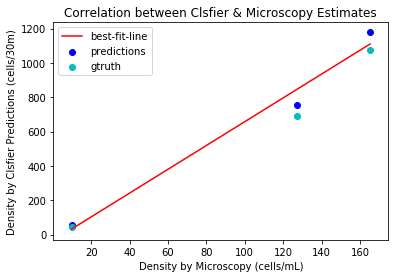

In [10]:
df = load_density_data(csv_fname.format('30m-gtruth'))
# Plot results
print()
print('Plotting results')
print('='*30 + 'Prorocentrum' + '='*30)
proro_df = plot_results(sorted(PRORO_COLUMNS), df)
print('='*30 + 'Corrected Prorocentrum' + '='*30)
proro_df = plot_results(sorted(PRORO_COLUMNS), df, corrected=True,
                        color='c', best_fit_line=False,
                        ylabel='30m',
                        title='Predictions/Gtruth (Proro) vs Micro (Proro)')
plt.legend(labels=('best-fit-line', 'predictions', 'gtruth'))
compute_accuracies(df)
print('Time range: 13:00:00 - 13:30:00')